In [60]:
import os
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt

def mix_image(image,random_map):
    flat = image.flatten()
    new_flat = np.ndarray(flat.shape)
    for index, rand_index in enumerate(random_map):
        new_flat[index] = flat[rand_index]
        
    return new_flat.reshape(image.shape)

def unmix_image(image,random_map):
    flat = image.flatten()
    new_flat = np.ndarray(flat.shape)
    for index, rand_index in enumerate(random_map):
        new_flat[rand_index] = flat[index]
        
    return new_flat.reshape(image.shape)

def save_data(object, filename, bin = 1):
    """Saves a compressed object to disk"""
    file = gzip.GzipFile(filename, 'wb')
    file.write(pickle.dumps(object, bin))
    file.close()

#----------------------------------------------------------
# Create mixed MNIST dataset
#----------------------

# Load MNIST data
filepath = './data/mnist.pkl.gz'
url = 'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'

if not os.path.isfile(filepath):
    print("Couldn't find MNIST dataset in ./data, downloading...")
    urllib.urlretrieve(url, filepath)

with gzip.open(filepath, 'rb') as f:
    data_chunks = pickle.load(f)
    
# Create Random mapping of pixels
image_size = 784
indices = [index for index in range(0,image_size)]
np.random.shuffle(indices)
rand_map = indices

# Mix MNIST data
mixed_data = []
for i, chunk in enumerate(data_chunks):
    images = chunk[0]
    labels = chunk[1]
    
    mixed_images = []
    for image in images:
        mixed_image = mix_image(image,rand_map)
        mixed_images.append(mixed_image)
    mixed_images = np.asarray(mixed_images)
    
    mixed_chunk = (mixed_images,labels)
    mixed_data.append(mixed_chunk)

# Save mixed data
filepath = './data/mixed_mnist.pkl.gz'
save_data(mixed_data,filepath)
 
# Save random map
filepath = './data/random_map.pkl'
pickle.dump(rand_map,open( filepath, "wb" ))        

[0, 4, 3, 8, 2, 6, 9, 7, 5, 1]
[0, 4, 3, 8, 2, 6, 9, 7, 5, 1]


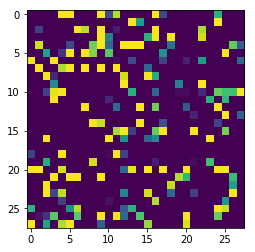

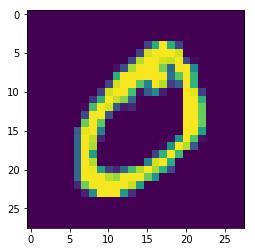

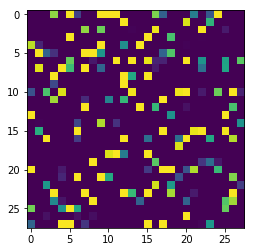

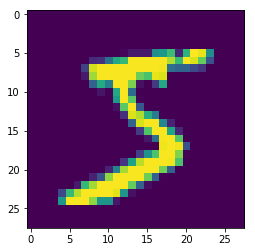

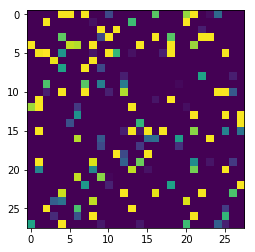

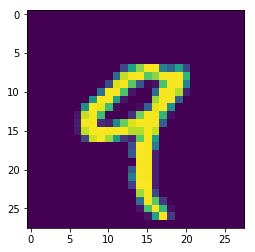

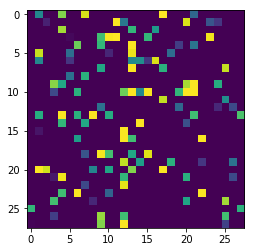

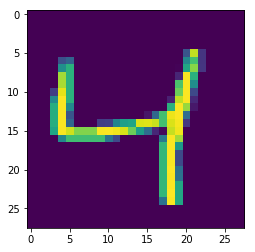

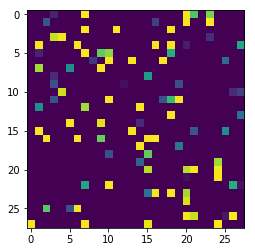

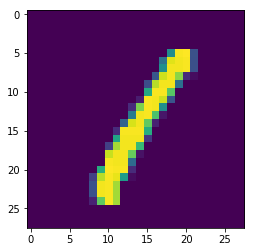

In [53]:
def shuffle(images, targets):
    rng_state = np.random.get_state()
    np.random.shuffle(images)
    np.random.set_state(rng_state)
    np.random.shuffle(targets)

def MNIST_load_mixed():
    filepath = './data/mixed_mnist.pkl.gz'

    with gzip.open(filepath, 'rb') as f:
        train_data, dev_data, test_data = pickle.load(f)
    
    tr_image, tr_label = train_data
    ts_image, ts_label = test_data
    shuffle(tr_image, tr_label)
    shuffle(ts_image, ts_label)

    return (tr_image, tr_label, ts_image, ts_label)

tr_image, tr_label, ts_image, ts_label = MNIST_load_mixed()